In [35]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv("../data/US-pumpkins.csv")

# The axis argument can take two values: ('index', 'columns'), indicates
# whether we should drop stuff from the index or columns.
pumpkins_subset = pumpkins.drop([c for c in pumpkins.columns if c not in ['Package', 'Low Price', 'High Price', 'Date']], axis='columns')

sold_as_bushel = pumpkins_subset['Package'].str.contains('bushel', case=True, regex=True)
pumpkins_subset = pumpkins_subset[sold_as_bushel]

print(pumpkins_subset.shape)
print(pumpkins_subset.head(10))

(415, 4)
                 Package      Date  Low Price  High Price
70  1 1/9 bushel cartons   9/24/16       15.0        15.0
71  1 1/9 bushel cartons   9/24/16       18.0        18.0
72  1 1/9 bushel cartons   10/1/16       18.0        18.0
73  1 1/9 bushel cartons   10/1/16       17.0        17.0
74  1 1/9 bushel cartons   10/8/16       15.0        15.0
75  1 1/9 bushel cartons   10/8/16       18.0        18.0
76  1 1/9 bushel cartons   10/8/16       17.0        17.0
77  1 1/9 bushel cartons   10/8/16       17.0        18.5
78  1 1/9 bushel cartons  10/15/16       15.0        15.0
79  1 1/9 bushel cartons  10/15/16       17.0        17.0


# Checks for missing data

In [18]:
pumpkins_subset.isnull().sum()

Package       0
Date          0
Low Price     0
High Price    0
dtype: int64

# Calculate the average monthly price of pumpkins

In [19]:
avg_price = 0.5 * (pumpkins_subset['Low Price'] + pumpkins_subset['High Price'])
month = pd.DatetimeIndex(pumpkins_subset['Date']).month

new_pumpkins = pd.DataFrame({'Package': pumpkins_subset['Package'], 'Month': month, 'Avg Price': avg_price, 'Low Price': pumpkins_subset['Low Price'], 'High Price': pumpkins_subset['High Price']})

# Note that 'High Price' and 'Low Price' are unnormalized
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Avg Price'] = avg_price / (1.0 + 1.0 / 9.0)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Avg Price'] = 2.0 * avg_price

print(new_pumpkins)

                   Package  Month  Avg Price  Low Price  High Price
70    1 1/9 bushel cartons      9      13.50      15.00        15.0
71    1 1/9 bushel cartons      9      16.20      18.00        18.0
72    1 1/9 bushel cartons     10      16.20      18.00        18.0
73    1 1/9 bushel cartons     10      15.30      17.00        17.0
74    1 1/9 bushel cartons     10      13.50      15.00        15.0
...                    ...    ...        ...        ...         ...
1738    1/2 bushel cartons      9      30.00      15.00        15.0
1739    1/2 bushel cartons      9      28.75      13.75        15.0
1740    1/2 bushel cartons      9      25.75      10.75        15.0
1741    1/2 bushel cartons      9      24.00      12.00        12.0
1742    1/2 bushel cartons      9      24.00      12.00        12.0

[415 rows x 5 columns]


# Plotting the data

In [22]:
price = new_pumpkins['Avg Price']
month = new_pumpkins['Month']

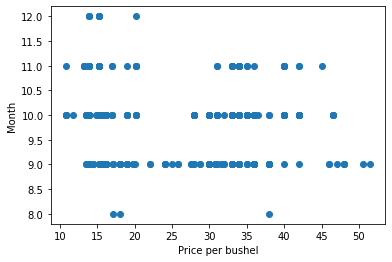

In [23]:
# Useless plot

plt.scatter(price, month)
plt.xlabel('Price per bushel')
plt.ylabel('Month')
plt.show()

                   Package  Month  Avg Price  Low Price  High Price
70    1 1/9 bushel cartons      9     13.500       15.0        15.0
71    1 1/9 bushel cartons      9     16.200       18.0        18.0
72    1 1/9 bushel cartons     10     16.200       18.0        18.0
73    1 1/9 bushel cartons     10     15.300       17.0        17.0
74    1 1/9 bushel cartons     10     13.500       15.0        15.0
75    1 1/9 bushel cartons     10     16.200       18.0        18.0
76    1 1/9 bushel cartons     10     15.300       17.0        17.0
77    1 1/9 bushel cartons     10     15.975       17.0        18.5
78    1 1/9 bushel cartons     10     13.500       15.0        15.0
79    1 1/9 bushel cartons     10     15.300       17.0        17.0
80    1 1/9 bushel cartons     10     15.975       17.0        18.5
81    1 1/9 bushel cartons     10     13.500       15.0        15.0
87    1 1/9 bushel cartons      9     16.200       18.0        18.0
88    1 1/9 bushel cartons      9     14.400    

<AxesSubplot:xlabel='Month'>

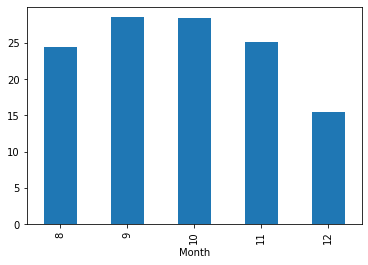

In [34]:
# More useful bar plot

print(new_pumpkins.groupby(['Month']).head(10))

new_pumpkins.groupby(['Month'])['Avg Price'].mean().plot(kind='bar')